**Jiahao Ye**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [156]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov
import pca_svd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [100]:
# Create PCA_SVD object here
iris_data = pd.read_csv('data/iris.csv')
pca = pca_svd.PCA_SVD(iris_data)

In [101]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

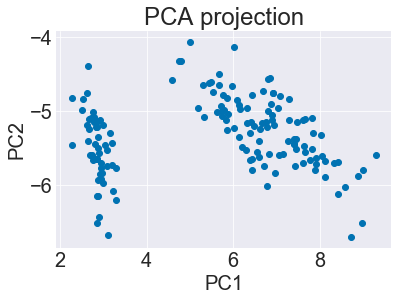

In [103]:
pcs_to_keep = [0, 1]
projected = pca.pca_project(pcs_to_keep)
x = projected[:,0]
y = projected[:,1]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection')
plt.scatter(x,y)
plt.show()

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [104]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

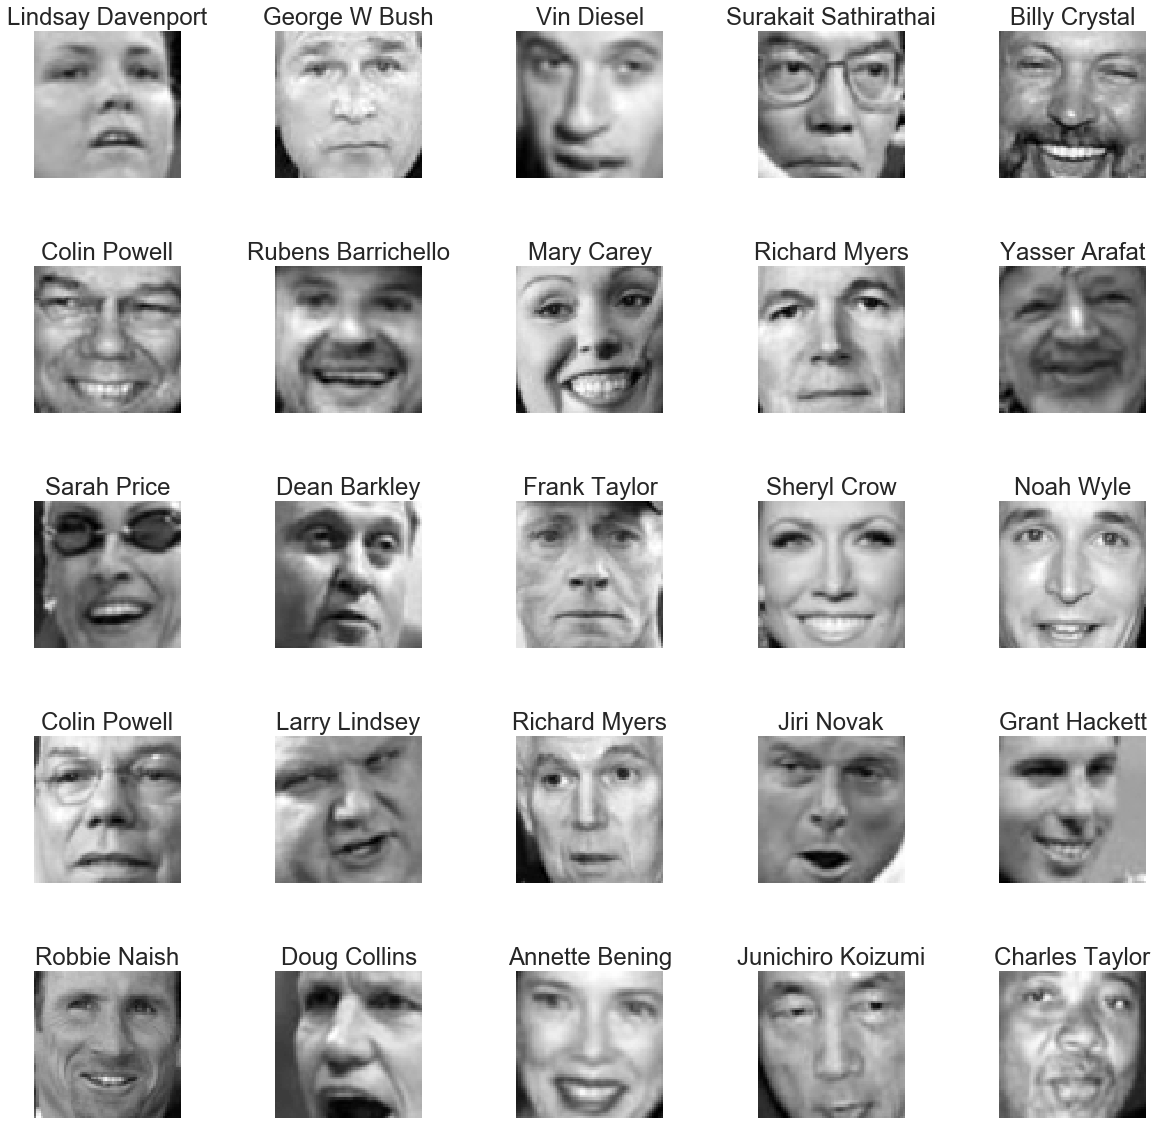

In [113]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    
    for i in range (25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.subplots_adjust(hspace = 0.6, wspace = 0.6)
        plt.imshow(face_imgs[i], cmap=plt.get_cmap('gray'))
        plt.title(face_names[i])
    pass

plt.figure(figsize = (20,20))
face_plot(face_imgs, face_names)

### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

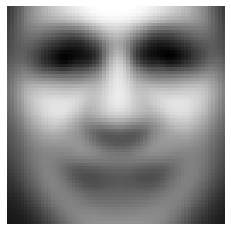

In [106]:
meanFace = np.mean(face_imgs, axis = 0)
plt.imshow(meanFace, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.show()

**Question 6:** What does the "mean face" image represent?

**Question 6 answer:**
- Conceptualy, mean face is a "averaged" face that has the mean/average features of the faces in the dataset.
- Mathematically/In terms of computational understanding, each pixel of the mean face has the mean value of the same-position-pixels of all the 13231 faces.

### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [107]:
# Your reshape code here
face_imgs_vec = face_imgs.reshape(13231, 4096)
print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [108]:
import time
PCA_SVD = pd.DataFrame(data = face_imgs_vec)
pca = pca_svd.PCA_SVD(PCA_SVD)

vars = [i for i in range(4096)]

start = time.time()
pca.pca(vars)
end = time.time()
elapsed = end - start
print(f"SVD: {elapsed}s")

SVD: 76.94825506210327s


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

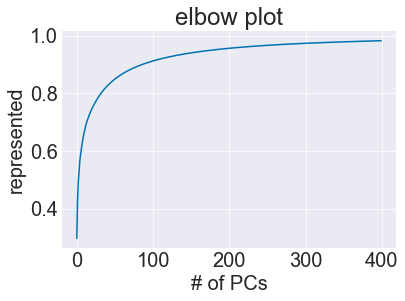

In [114]:
pca.elbow_plot(400)
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

# 50% -> PC = 2
# pca.elbow_plot(4)

# 70% -> PC = 15
# pca.elbow_plot(15)

# 80% -> PC = 30
# pca.elbow_plot(30)

# 95% -> PC = 200
# pca.elbow_plot(200)

### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [115]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    return reconstucted_imgs.reshape(13231,64,64)
    
    pass

#### 50% variance face grid

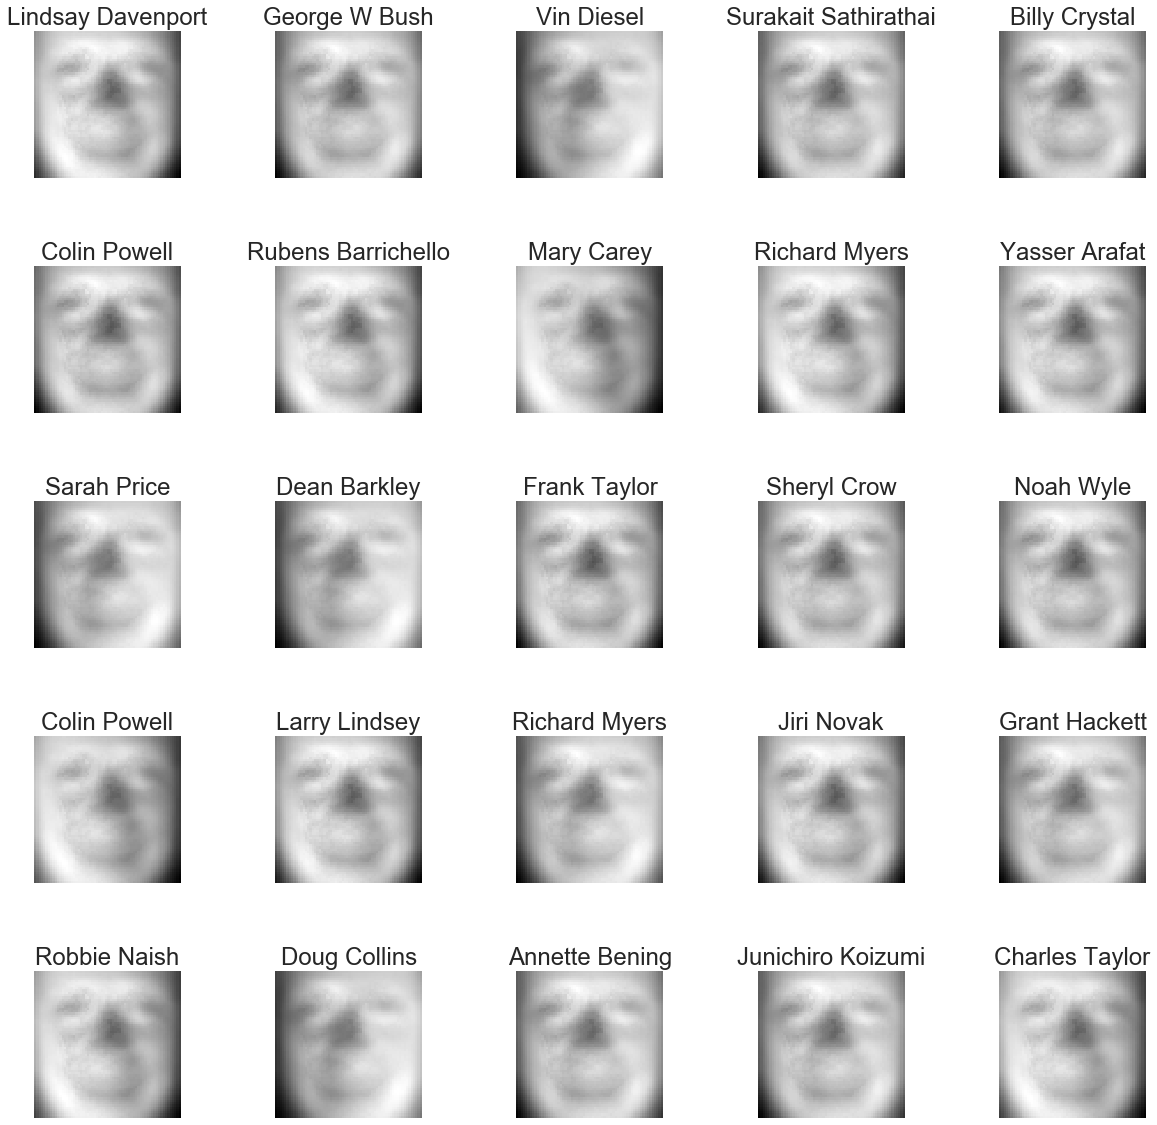

In [116]:
reconstucted_imgs = pca.pca_then_project_back(2)
imgs = make_imgs(reconstucted_imgs)

plt.figure(figsize = (20,20))
face_plot(imgs, face_names)

#### 70% variance face grid

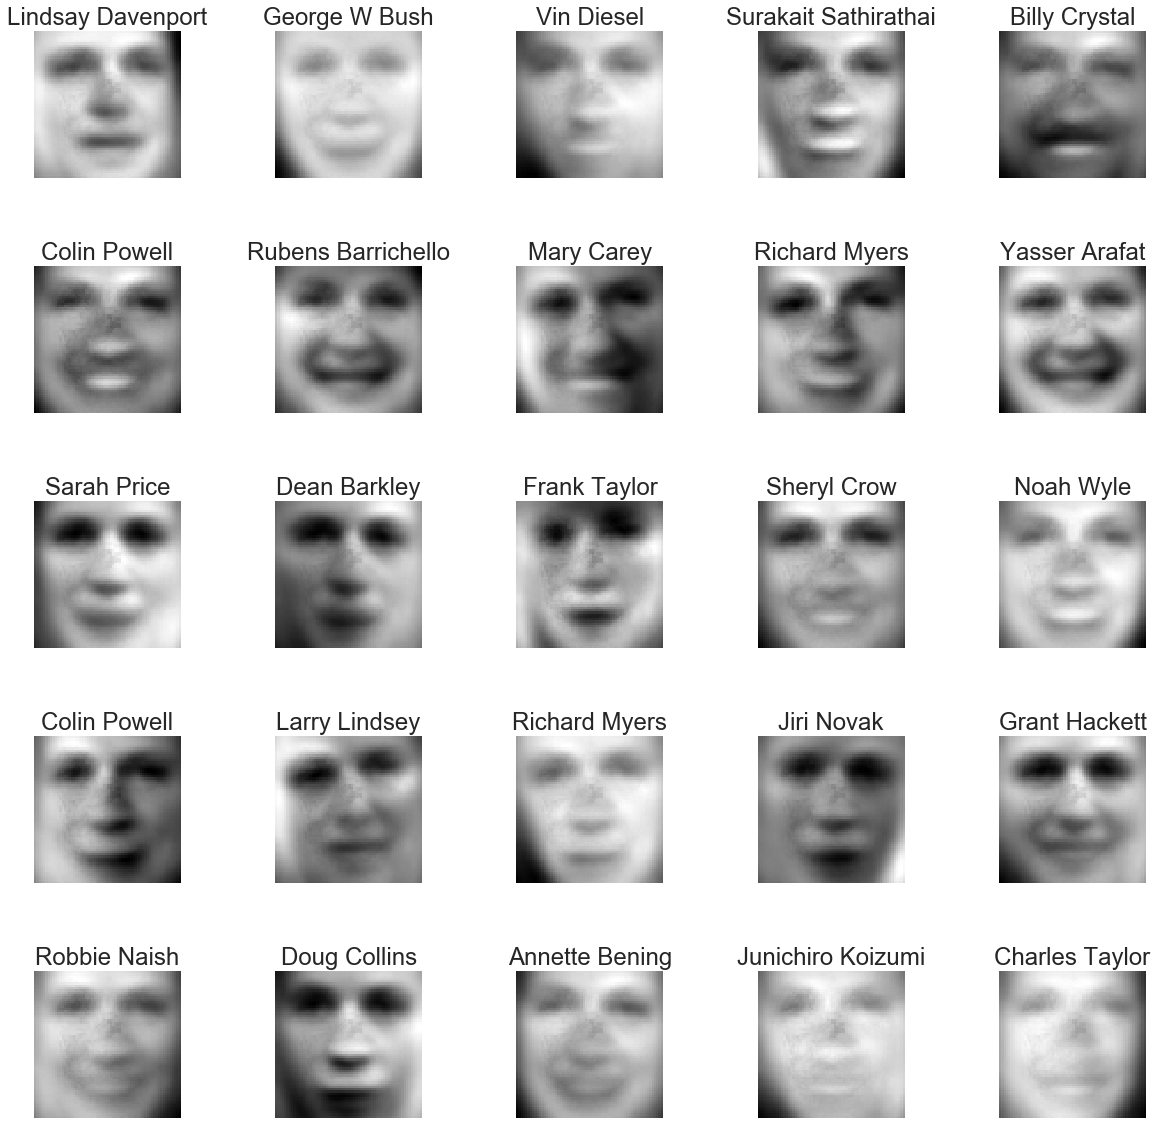

In [117]:
reconstucted_imgs = pca.pca_then_project_back(15)
imgs = make_imgs(reconstucted_imgs)

plt.figure(figsize = (20,20))
face_plot(imgs, face_names)

#### 80% variance face grid

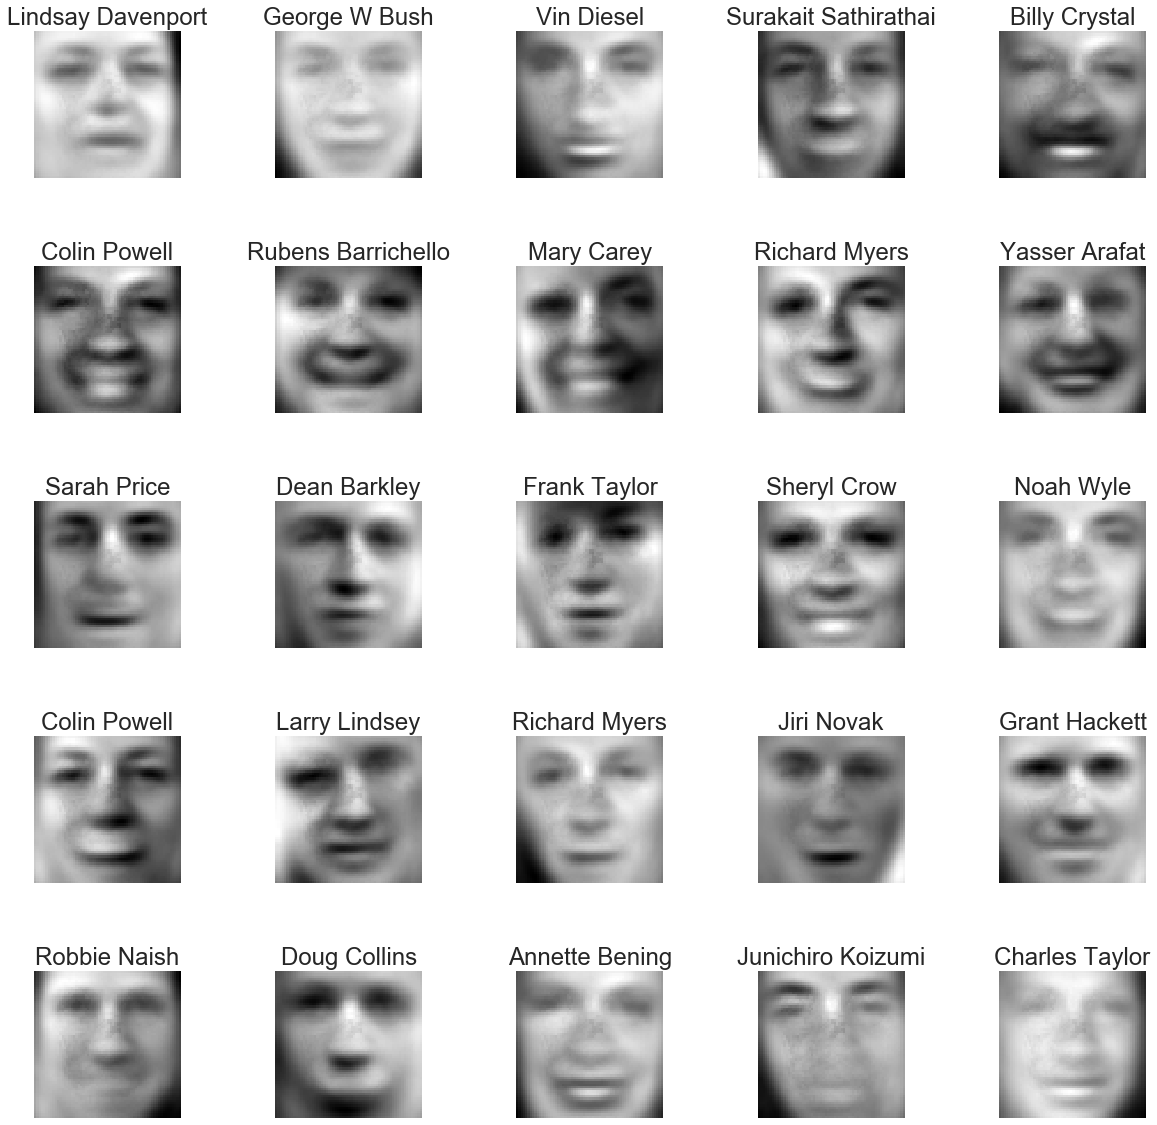

In [118]:
reconstucted_imgs = pca.pca_then_project_back(30)
imgs = make_imgs(reconstucted_imgs)

plt.figure(figsize = (20,20))
face_plot(imgs, face_names)

#### 95% variance face grid

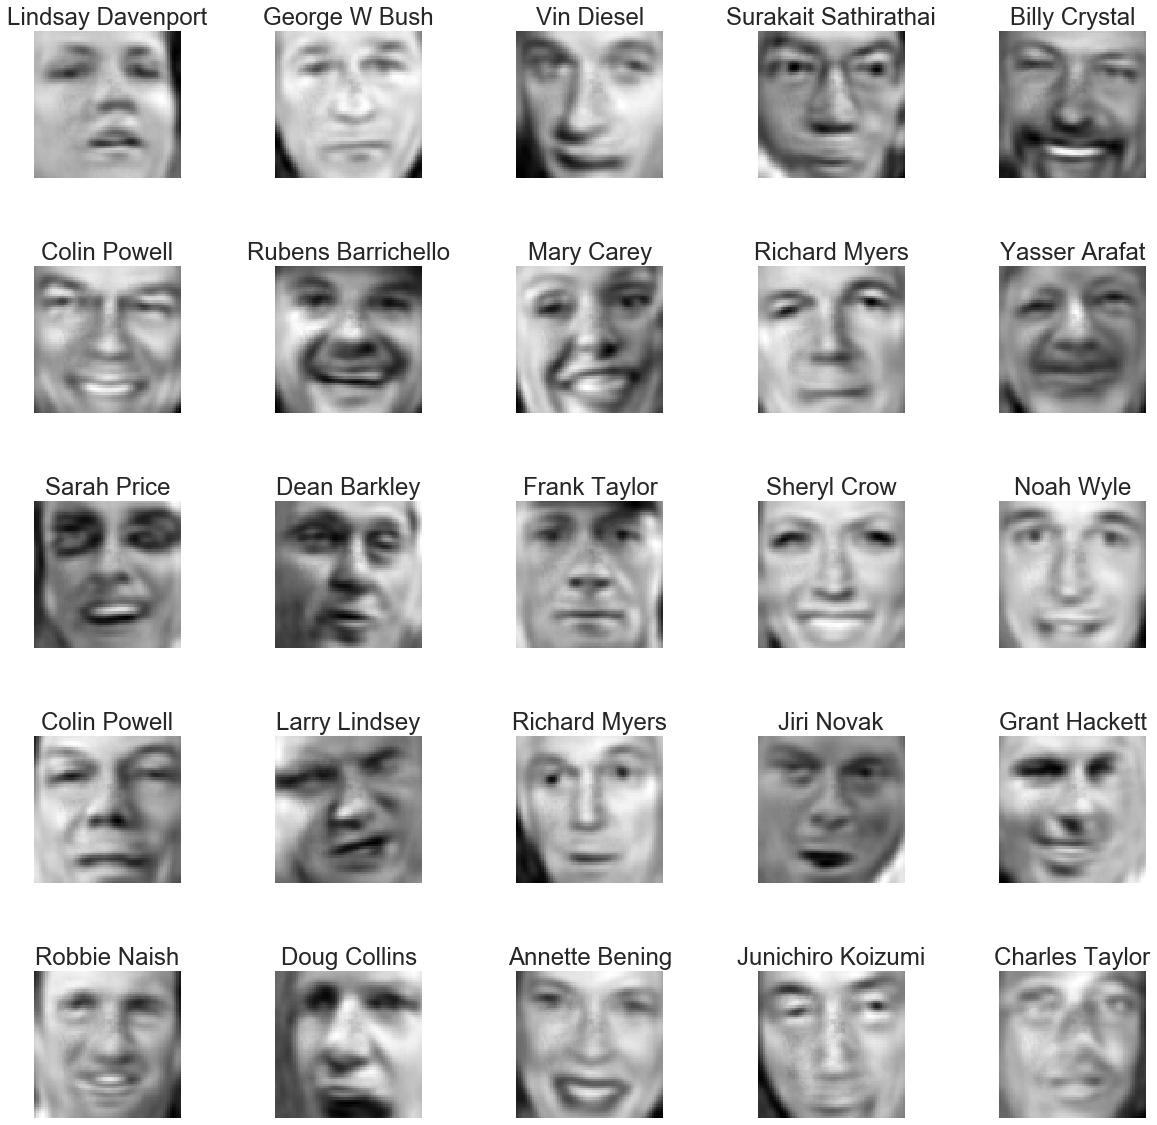

In [119]:
reconstucted_imgs = pca.pca_then_project_back(200)
imgs = make_imgs(reconstucted_imgs)

plt.figure(figsize = (20,20))
face_plot(imgs, face_names)

**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer:**
- As the variance% increases, the face reconstruction has more facial features and gets clearer.
- In other words, as the #of PC increases (more and more variance being acounted), the face reconstruction resembles more like real human face.

## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [120]:
PCA = pd.DataFrame(data = face_imgs_vec)
pca_cov = pca_cov.PCA_COV(PCA)

vars = [i for i in range(4096)]

start = time.time()
pca_cov.pca(vars)
end = time.time()
elapsed = end - start
print(f"COV: {elapsed}s ")

COV: 34.54218292236328s 


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:**
- COV method takes 34.54218292236328s
- SVD method takes 76.94825506210327s
- SVD takes longer time to process

### 5b) Stability comparison

In the cell below compute the difference between:
- eigenvalues
- eigenvectors

obtained from the two approaches. Sum up the **absolute differences** and print out the resulting float value.

In [45]:
diff_e_vals = abs(pca.e_vals - pca_cov.e_vals)
diff_e_vecs = abs(pca.e_vecs - pca_cov.e_vecs)
print("sum of absolute differences in...")
print(f"eigenvalues: {np.sum(diff_e_vals)}")
print(f"eigenvectors: {np.sum(diff_e_vecs)}")  

sum of absolute differences in...
eigenvalues: 4.068150688540939e-08
eigenvectors: 206346.0863654237


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:**
It means the cov method doesn't work well in this case, since the error in eigenvectors obtained by cov method is extremely huge. In other words, the above descrepencies show that cov-based method is less stable than svd-based one.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, loading plot, proportion variance explained, etc) to inform your analysis and exploration. 
- Do PCA and SVD based PCA yield different results?

## Dataset A: Students Performance in Exams
- Three main numerical variables: math score, reading score, and writing score
- **My assumption/hypothesis**: There may be a **consistancy** in between the **reading score and writing score**, since they are reflections of literature ability.

### 1 SVD-based PCA and Analysis

In [144]:
score_data = pd.read_csv('data/score.csv')
pca_score_svd = pca_svd.PCA_SVD(score_data)

vars = ["math score","reading score","writing score"]
pca_score_svd.pca(vars)

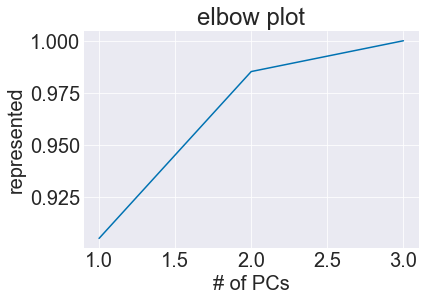

In [145]:
pca_score_svd.elbow_plot()
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

- I would preserve 2PCs, as they are enough to effectively tell(represent) the original data variance (>97%). When more PCs are added after PC2, the newly covered porportion is not as significant.

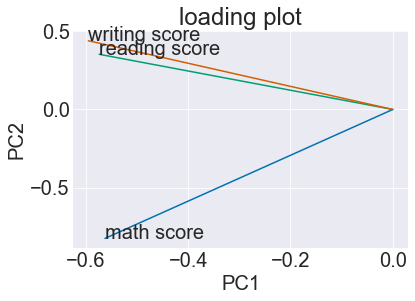

In [146]:
pca_score_svd.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- **PC1** is **negatively associated** with **math score**, **reading score**, and **writing score**
- **writing score** and **reading score** are **positively correlated**! (**hypothesis proved!**)

In [147]:
print(f'Cumulative proportion variance account for:\n{pca_score_svd.get_cum_var()}')

Cumulative proportion variance account for:
[0.9052343784946667, 0.9852328246233547, 0.9999999999999999]


- The three cumulative proportion variance accounted correspond to PC1, PC1+PC2, PC1+PC2+PC3
- We can then reach the same conclusion as we did via the elbow plot that——2PCs are fairly enough to represent the original data because they together account for 98.5% of the data variance, with an increase of 8% from 1PC, and only 1% less than that of 3PCs.

### 2 COV-based PCA and Analysis

In [157]:
score_data = pd.read_csv('data/score.csv')
pca_score_cov = pca_cov.PCA_COV(score_data)

vars = ["math score","reading score","writing score"]
pca_score_cov.pca(vars)

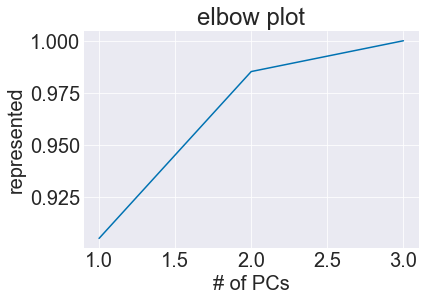

In [159]:
pca_score_cov.elbow_plot()
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

- ^^**Elbow Plot—same as the above**

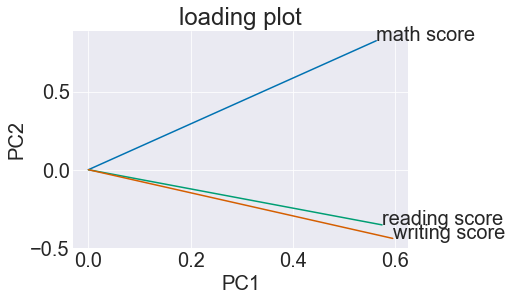

In [162]:
pca_score_cov.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- Interestingly, the loading plot from COV-method is differen from the one of svd-method, 
- in this plot..
- PC1 is now *POSITIVELY* associated with **reading score**, **writing score**, and **math score**
- The reading score and writing score are still positively correlated

In [160]:
print(f'Cumulative proportion variance account for:\n{pca_score_cov.get_cum_var()}')

Cumulative proportion variance account for:
[0.9052343784946667, 0.9852328246233547, 1.0]


- ^^ **Same as the above**

### 3 Comparison on SVD/COV based PCA Result

- In this case, SVD/COV derived **same** results—**except** that in the loading plot, PC1's association with variables is the **opposite** of each other.

##  Dataset B: Student Study Information
- This dataset includes social, gender and study information about students
- Some variables include:
- absences: number of school absences
- G1: first period grade
- G2: second period grade
- G3: final grade

In [168]:
study_data = pd.read_csv('data/study.csv')
pca_study_svd = pca_svd.PCA_SVD(study_data)

vars = ["traveltime","studytime","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"]
pca_study_svd.pca(vars)

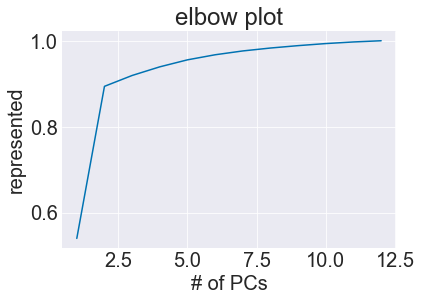

In [170]:
pca_study_svd.elbow_plot()
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

- I would preserve 2 principle components, as they are enough to effectively tell(represent) the original data variance; there's a clear break point after 2PCs where the increase in proportion represented is significantly less than that of previous PCs

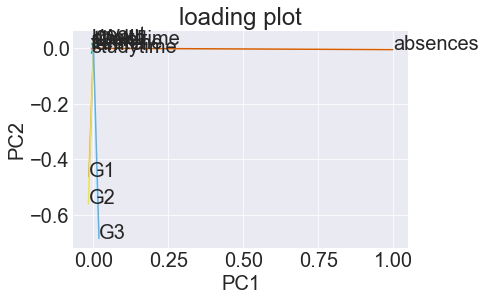

In [152]:
pca_study_svd.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- PC1 is positively associated with **absences**
- PC2 is negatively associated with **G1**, **G2**, **G3**
- G1, G2, G3 are positively correlated
- Surprisingly, **absences** and **grades** are not correlated?? (in this specific data sample)

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.